# Modelo Black-Scholes

Objetivo General
 - Utilizar el modelo matemático de Black - Scholes para la toma de decisiones financieras.

Objetivos Específico
 - Determinar el costo de una acción usando el modelo Black - Scholes

## Modelo que representa el problema

 $ C = S.N(d1) - X.e ^-r.t . N(d2)$

### Supuestos

>- No hay costes de transacción o impuestos.
>- La tasa de interés libre de riesgo es constante para todos los vencimientos.
>- La acción no paga dividendos.
>- La volatilidad se mantiene constante.
>- Se permite la venta en corto.
>- No hay oportunidades de arbitraje sin riesgo.
>- Asume que la distribución de probabilidad de los retornos es una distribución normal.

## Simulaciones

In [45]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline
import time 

In [46]:
def d1(S0, K, r, sigma, T):
    return (np.log(S0/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T))

In [47]:
def d2(S0, K, r, sigma, T):
    return (np.log(S0 / K) + (r - sigma**2 / 2) * T) / (sigma * np.sqrt(T))

In [48]:
S0 = 500
K = 400
r=1.1
sigma = 0.30
T = 0.25
Otype='C'

In [49]:
print ("S0 = Precio de la accion en el tiempo 0:", S0)
print ("K = Precio fijo:", K)
print ("r = Tasa libre de riesgo:", r)
print ("sigma = Volatilidad del precio:", sigma)
print ("T = Periodo de vencimiento:", T)


S0 = Precio de la accion en el tiempo 0: 500
K = Precio fijo: 400
r = Tasa libre de riesgo: 1.1
sigma = Volatilidad del precio: 0.3
T = Periodo de vencimiento: 0.25


In [50]:
d1(S0 , K , r , sigma , T)

3.395957008761399

In [51]:
d2(S0 , K , r , sigma , T)

3.245957008761399

In [52]:
def BlackScholes(type,S0, K, r, sigma, T):
    if type=="C":
        # Opcion C es una opcion de compra Europea
        return S0 * ss.norm.cdf(d1(S0, K, r, sigma, T)) - K * np.exp(-r * T) * ss.norm.cdf(d2(S0, K, r, sigma, T))
    else:
        return K * np.exp(-r * T) * ss.norm.cdf(-d2(S0, K, r, sigma, T)) - S0 * ss.norm.cdf(-d1(S0, K, r, sigma, T))

In [53]:
S0 = 500
K = 400
r=1.1
sigma = 0.30
T = 0.25
Otype='C'

In [54]:
print ("S0 = Precio de la accion en el tiempo 0:", S0)
print ("K = Precio fijo:", K)
print ("r = Tasa libre de riesgo:", r)
print ("sigma = Volatilidad del precio:", sigma)
print ("T = Periodo de vencimiento:", T)

S0 = Precio de la accion en el tiempo 0: 500
K = Precio fijo: 400
r = Tasa libre de riesgo: 1.1
sigma = Volatilidad del precio: 0.3
T = Periodo de vencimiento: 0.25


In [64]:
t=time.time()
BS = BlackScholes(Otype,S0, K, r, sigma, T)
elasticidad=time.time()-t
print ("BS\tBlack-Scholes price:", BS,"Elasticidad" , elasticidad)

BS	Black-Scholes price: 196.17800369074956 Elasticidad 0.002000570297241211


## Conclusiones 

En conclusión la Ecuacion de Black - Scholes no es efectiva a la hora de  hacer predicciones. Se acerca al precio de la acción, pero en la actualidad ya no es un modelo efectivo a menos que se cumplan todos los supuestos.

## Bibliografía 

MacBeth, J. D., & Merville, L. J. (1980). Tests of the Black‐Scholes and Cox call option valuation models. The Journal of Finance.

In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime
import datetime 
import seaborn as sns

import pandas_datareader.data as web

%matplotlib inline

In [57]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2012, 12, 30)
aapl= web.DataReader("AAPL", "morningstar", start, end)

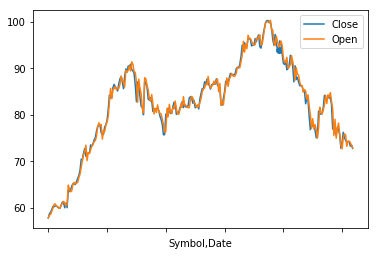

In [63]:
aapl[["Close","Open"]].plot()
plt.scatter(BS,94)